# Regression with Deep Neural Networks

## Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

# Note this preceding portion is not my code

In [25]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [26]:
import tensorflow as tf

## Create Data

In [27]:
# generate x's, y's for function w/ domain [1..10]
x_s = np.linspace(0,10,1000)
y_s = -1*(np.sin(2*x_s) + x_s**1.2 - x_s**1.25 + np.cos(3*x_s))
# normalize y's to range [0..1]
y_s = (y_s - np.min(y_s))/(np.max(y_s) - np.min(y_s))

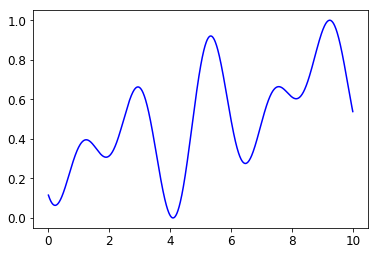

In [28]:
plt.plot(x_s,y_s,'b')

(1000,)
(1000, 1)
(1000,)


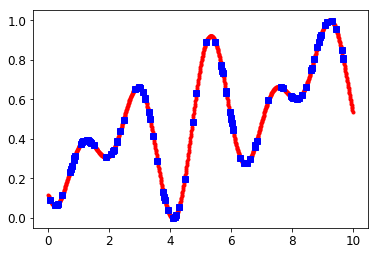

In [29]:
print(x_s.shape)
# make x_s into a column vector for TF
x_s = np.reshape(x_s,[-1,1])
# shuffle - then split into train and test
rnd_inds = np.arange(len(x_s))
np.random.shuffle(rnd_inds)
print(x_s.shape)
print(y_s.shape)
# print(rnd_inds)
x_s = x_s[rnd_inds,:]
y_s = y_s[rnd_inds]
X_train = x_s[:900]
y_train = y_s[:900]
X_test = x_s[900:]
y_test = y_s[900:]

plt.plot(X_train,y_train,'r.')
plt.plot(X_test,y_test,'bs')


In [30]:
# take validation set from training data
X_valid, X_train = X_train[:100], X_train[100:]
y_valid, y_train = y_train[:100], y_train[100:]

In [ ]:
plt.plot(X_train,y_train,'r.')
plt.plot(X_valid,y_valid,'gd')

## Neural Network

In [ ]:
num_epochs = int(1e6)
batch_size = 1 # NOTE: ONLY SEEMS TO WORK W/ BATCH SIZE 1

n_inputs = 1
n_outputs = 1
num_nodes_l1 = 10 # 100 doesn't matter
num_nodes_l2 = 10

In [ ]:
xs = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
ys = tf.placeholder(tf.float32, shape=(None), name="y") 

In [ ]:
hidden1 = tf.layers.dense(xs, num_nodes_l1, name="hidden1",
                              activation=tf.nn.relu)
hidden2 = tf.layers.dense(hidden1, num_nodes_l2, name="hidden2",
                              activation=tf.nn.relu)
outputs = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [ ]:
cost = tf.reduce_mean(tf.square(outputs-ys))
train = tf.train.AdamOptimizer(0.001).minimize(cost)

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(num_epochs):
        # print out progress
        if not(i%(10000)):
            print(i)
        # select random subsets of data to train on (aka batches)
        rnd_idx = np.random.permutation(len(X_train))[:batch_size]
        X_batch = X_train[rnd_idx]
        y_batch = y_train[rnd_idx]
        sess.run(train, feed_dict={xs: X_batch, ys: y_batch})
        
    # generate predicted output values for y
    pred_ys = sess.run(outputs, feed_dict={xs:X_test})


In [ ]:
plt.plot(X_test,y_test,'bd')
plt.plot(X_test,pred_ys,'rd')

## Now try your own 1-D function

## My code starts here

In [31]:
x_s2 = np.linspace(0,10,1000)
y_s2 = -1*(np.sin(2*x_s2)**2 + x_s2**1.2 - x_s2**1.25 + np.cos(4.82*x_s2))**3
# normalize y's to range [0..1]
y_s2 = (y_s2 - np.min(y_s2))/(np.max(y_s2) - np.min(y_s2))

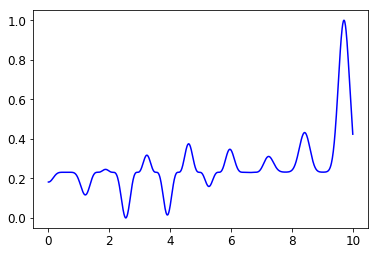

In [32]:
plt.plot(x_s2,y_s2,'b')

(1000,)
(1000, 1)
(1000,)


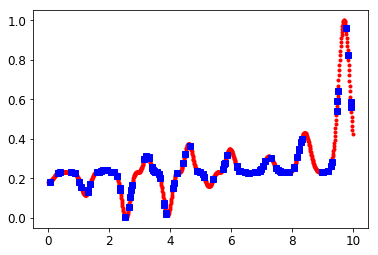

In [33]:
print(x_s2.shape)
# make x_s into a column vector for TF
x_s2 = np.reshape(x_s2,[-1,1])
# shuffle - then split into train and test
rnd_inds = np.arange(len(x_s2))
np.random.shuffle(rnd_inds)
print(x_s2.shape)
print(y_s2.shape)
# print(rnd_inds)
x_s2 = x_s2[rnd_inds,:]
y_s2 = y_s2[rnd_inds]
X_train2 = x_s2[:900]
y_train2 = y_s2[:900]
X_test2 = x_s2[900:]
y_test2 = y_s2[900:]

plt.plot(X_train2,y_train2,'r.')
plt.plot(X_test2,y_test2,'bs')


## Not great, too sparse on back

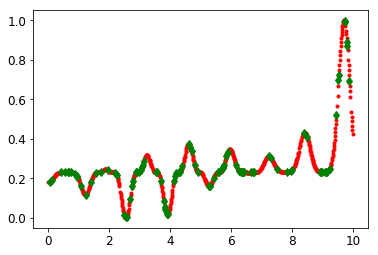

In [34]:
# take validation set from training data
X_valid2, X_train2 = X_train2[:100], X_train2[100:]
y_valid2, y_train2 = y_train2[:100], y_train2[100:]

plt.plot(X_train2,y_train2,'r.')
plt.plot(X_valid2,y_valid2,'gd')

## Also try to modify training loop so you can plot loss values (not all million!)

In [ ]:
loss_vs = []
loop = []


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(num_epochs):
        # select random subsets of data to train on (aka batches)
        rnd_idx = np.random.permutation(len(X_train2))[:batch_size]
        X_batch = X_train2[rnd_idx]
        y_batch = y_train2[rnd_idx]
        _, loss = sess.run([train, cost], feed_dict={xs: X_batch, ys: y_batch})
        
        '''_, loss_val = sess.run([train_step, cross_entropy],
                           feed_dict={x: batch_xs, y_: batch_ys})
        '''
        
        # print out progress
        if not(i%(10000)):
            print(i/num_epochs, '%')
            if i > 0:
                loss_vs.append(loss)
                loop.append(i)
        
    # generate predicted output values for y
    pred_ys = sess.run(outputs, feed_dict={xs:X_test2})


In [ ]:
plt.plot(loop,loss_vs,'b')

In [ ]:
plt.plot(X_test2, y_test2,'bd')
plt.plot(X_test2, pred_ys,'rd')

## About as expected as spike gets high weight but low definition

## Now try to modify code for 2-D input data (so y = f(x_1,x_2))

In [3]:
from sklearn.datasets import load_boston
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
def nn(X , y, itr = 10**6, v = False, ninputs = 1, noutputs = 1):
    
    """Using recomendation: In sum, for most problems, one could probably get decent performance (even without a second optimization step) by setting the hidden layer configuration using just two rules: (i) number of hidden layers equals one; and (ii) the number of neurons in that layer is the mean of the neurons in the input and output layers."""
    #clear graph
    tf.reset_default_graph()
    
    #setting the hyperparameters
    num_epochs = int(1e6)
    batch_size = 1 # NOTE: ONLY SEEMS TO WORK W/ BATCH SIZE 1
    n_inputs = ninputs
    n_outputs = noutputs
    
    # layer 1
    

        
        
    # Does the data fit?
    assert(X.shape[0] == y.shape[0])
    
    #add bias
    
    ##
    
    # Shuffle the data
    rnd_inds = np.arange(X.shape[0])
    np.random.shuffle(rnd_inds)
    X = X[rnd_inds,:]
    y = y[rnd_inds]
    
    if v == True:
        print('X:', X.shape)
        print('\tX[0]:', X.shape[0])
        print('\tX[1]:', X.shape[1])
        print('y:', y.shape)
        print('\ty[0]:', y.shape[0])
    
    train = int(y.shape[0]*.8)
    test = int((y.shape[0] - train)/2)
    print('train size:', y.shape[0]*.8)
    print('test size:', test)
    
    
    # Train test split
    X_train = X[:train]
    y_train = y[:train]
    
    
    # Validation split
    X_valid, X_test = X[train:train + test], X[train + test:]
    y_valid, y_test = y[train:train + test], y[train + test:]
    
    
    xs = tf.placeholder(tf.float32, shape=(None, X.shape[1]), name="X")
    ys = tf.placeholder(tf.float32, shape=(None), name="y") 
    
    
    '''
    #make layers
    for n in range(neurons):
        hidden = tf.layers.dense(xs, neurons[n], name="hidden" + n,
                              activation=tf.nn.relu)
    '''
    #for loss plot
    loop =[]
    loss_vals = []
    #layer creation
    input_L = tf.layers.dense(xs, X.shape[1], name="input",
                              activation=tf.nn.relu)
    
    mid1 = tf.layers.dense(input_L, (X.shape[1] + 1)/2,
                              name="mid", activation=tf.nn.relu)
    
    output = tf.layers.dense(mid1, n_outputs, name="output")
    
    #cost fn and optimizer
    cost = tf.reduce_mean(tf.square(output-ys))
    train = tf.train.AdamOptimizer(0.001).minimize(cost)
    
    
    
    
    
    
    #running the session
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for i in range(num_epochs):
            # select random subsets of data to train on (aka batches)
            rnd_idx = np.random.permutation(len(X_train))[:batch_size]
            X_batch = X_train[rnd_idx]

            y_batch = y_train[rnd_idx]
            _, loss = sess.run([train, cost], feed_dict={xs: X_batch, ys: y_batch})

            # print out progress
            if not(i%(10000)):
                #print(X_batch)
                print(i/num_epochs*100, '%')
                if i > 0:
                    loss_vals.append(loss)
                    loop.append(i)
 
        # generate predicted output values for y
        pred_ys = sess.run(output, feed_dict={xs:X_test})
        
        
        
        return pred_ys, y_test, loss_vals, loop


         

## Loss within training data

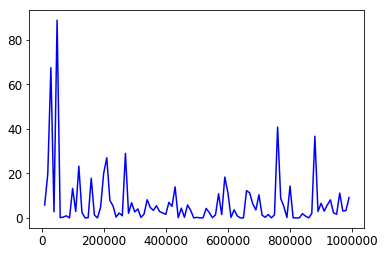

In [7]:
out = nn(load_boston().data, load_boston().target, itr = 10**6, v = True, ninputs = 1, noutputs = 1)
b n 

In [10]:
from sklearn.metrics import mean_squared_error as MSE

MSE(out[0], out[1])

8.132028812284938

## This could be improved